<a href="https://colab.research.google.com/github/ash-myth/ShadowFox/blob/main/Cricket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel('IPL sample data.xlsx')


In [ ]:
df.head(10)

,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout,NaN,NaN
1,Runs,"""+"" stands for runs saved ""-"" stands for runs ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount,Venue,Stadium
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1,Delhi,Arun Jaitly Stadium
5,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
6,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
7,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium
8,NaN,IPL2367,1,Delhi Capitals,NaN,0.5,NaN,NaN,NaN,NaN,1,Delhi,Arun Jaitly Stadium
9,NaN,IPL2367,1,Delhi Capitals,Lalit yadav,0.6,cover point,Y,Y,NaN,1,Delhi,Arun Jaitly Stadium


In [ ]:
df.describe()

,Pick,Y->,Clean Pick,N->,Fumble,C->,Catch,DC->,Dropped Catch,S->,Stumping,Unnamed: 11,Unnamed: 12
count,2,31,54,22,19,22,19,19,16,11,22,21,13
unique,2,20,37,8,13,17,12,7,6,5,10,8,2
top,Throw,IPL2367,1,Delhi Capitals,1,0,0,Y,0,1,2,Delhi,Arun Jaitly Stadium
freq,1,12,14,12,4,5,6,8,6,4,7,12,12


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pick           2 non-null      object
 1   Y->            31 non-null     object
 2   Clean Pick     54 non-null     object
 3   N->            22 non-null     object
 4   Fumble         19 non-null     object
 5   C->            22 non-null     object
 6   Catch          19 non-null     object
 7   DC->           19 non-null     object
 8   Dropped Catch  16 non-null     object
 9   S->            11 non-null     object
 10  Stumping       22 non-null     object
dtypes: object(11)
memory usage: 6.5+ KB


In [ ]:
df.columns

Index(['Pick', 'Y->', 'Clean Pick', 'N->', 'Fumble', 'C->', 'Catch', 'DC->',
       'Dropped Catch', 'S->', 'Stumping'],
      dtype='object')

In [ ]:
df = df.rename(columns={'Fumble': 'Player Name'})


In [ ]:
df = df[df['Player Name'].notna()]

In [ ]:
df.head(10)

,Pick,Y->,Clean Pick,N->,Player Name,C->,Catch,DC->,Dropped Catch,S->,Stumping
0,Throw,Y->,Good Throw,N->,Bad throw,DH->,Dirct Hit,RO->,Run Out,MR->,Missed Runout
3,NaN,Match No.,Innings,Teams,Player Name,BallCount,Position,Pick,Throw,Runs,Overcount
4,NaN,IPL2367,1,Delhi Capitals,Rilee russouw,0.1,Short mid wicket,n,NaN,1,1
5,NaN,IPL2367,1,Delhi Capitals,Phil Salt,0.2,wicket keeper,Y,Y,NaN,1
6,NaN,IPL2367,1,Delhi Capitals,Yash Dhull,0.3,covers,Y,Y,NaN,1
7,NaN,IPL2367,1,Delhi Capitals,Axer Patel,0.4,point,Y,Y,NaN,1
9,NaN,IPL2367,1,Delhi Capitals,Lalit yadav,0.6,cover point,Y,Y,NaN,1
10,NaN,IPL2367,1,Delhi Capitals,Aman Khan,1.1,long off,Y,Y,NaN,2
12,NaN,IPL2367,1,Delhi Capitals,Kuldeep yadav,1.3,Short mid wicket,Y,NaN,NaN,2
14,NaN,IPL2367,1,Delhi Capitals,Kuldeep yadav,1.5,point,Y,Y,NaN,2


In [ ]:
df = df.rename(columns={
    'Clean Pick': 'CP',
    'Fumble': 'FUM',
    'Catch': 'C',
    'Dropped Catch': 'DC',
    'Stumping': 'ST'
})

In [ ]:
cols_to_convert = ['CP', 'C', 'DC', 'ST']

In [ ]:
df[cols_to_convert ] = df[cols_to_convert ].apply(pd.to_numeric, errors='coerce').fillna(0)

In [ ]:
weights = {
    'CP': 1,
    'C': 10,
    'DC': -5,
    'ST': 8
}

In [ ]:
df['PS'] = (
    df['CP'] * weights['CP'] +
    df['C'] * weights['C'] +
    df['DC'] * weights['DC'] +
    df['ST'] * weights['ST']
)

In [ ]:
print(df[['CP', 'C', 'DC', 'ST', 'PS']])

     CP    C   DC   ST    PS
0   0.0  0.0  0.0  0.0   0.0
3   0.0  0.0  0.0  0.0   0.0
4   1.0  0.0  0.0  1.0   9.0
5   1.0  0.0  0.0  1.0   9.0
6   1.0  0.0  0.0  1.0   9.0
7   1.0  0.0  0.0  1.0   9.0
9   1.0  0.0  0.0  1.0   9.0
10  1.0  0.0  0.0  2.0  17.0
12  1.0  0.0  0.0  2.0  17.0
14  1.0  0.0  0.0  2.0  17.0
15  1.0  0.0  0.0  2.0  17.0
21  0.0  0.0  0.0  0.0   0.0
22  2.0  0.0  0.0  2.0  18.0
23  1.0  0.0  0.0 -1.0  -7.0
24  3.0  0.0  1.0  3.0  22.0
25  2.0  1.0  0.0  0.0  12.0
26  1.0  0.0  0.0 -2.0 -15.0
27  4.0  0.0  0.0  1.0  12.0
28  3.0  0.0  0.0  4.0  35.0


In [ ]:
df_grouped = df.groupby("Player Name")[['CP', 'C', 'DC', 'ST', 'PS']].sum().sort_values(by="PS", ascending=False)
print(df_grouped)


                CP    C   DC   ST    PS
Player Name                            
1              8.0  1.0  0.0  4.0  50.0
Kuldeep yadav  2.0  0.0  0.0  4.0  34.0
Lalit yadav    2.0  0.0  0.0  3.0  26.0
2              3.0  0.0  1.0  3.0  22.0
Aman Khan      1.0  0.0  0.0  2.0  17.0
Yash Dhull     1.0  0.0  0.0  1.0   9.0
Axer Patel     1.0  0.0  0.0  1.0   9.0
Rilee russouw  1.0  0.0  0.0  1.0   9.0
Phil Salt      1.0  0.0  0.0  1.0   9.0
0              5.0  0.0  0.0  0.0   5.0
Catches (C)    0.0  0.0  0.0  0.0   0.0
Bad throw      0.0  0.0  0.0  0.0   0.0
Player Name    0.0  0.0  0.0  0.0   0.0


In [ ]:
top3 = df_grouped.head(3)
print(top3)

                CP    C   DC   ST    PS
Player Name                            
1              8.0  1.0  0.0  4.0  50.0
Kuldeep yadav  2.0  0.0  0.0  4.0  34.0
Lalit yadav    2.0  0.0  0.0  3.0  26.0


In [ ]:
df_grouped.to_excel("Top_Fielders_Analysis.xlsx")

In [ ]:
print(df.columns)

Index(['Pick', 'Y->', 'CP', 'N->', 'Player Name', 'C->', 'C', 'DC->', 'DC',
       'S->', 'ST', 'PS'],
      dtype='object')


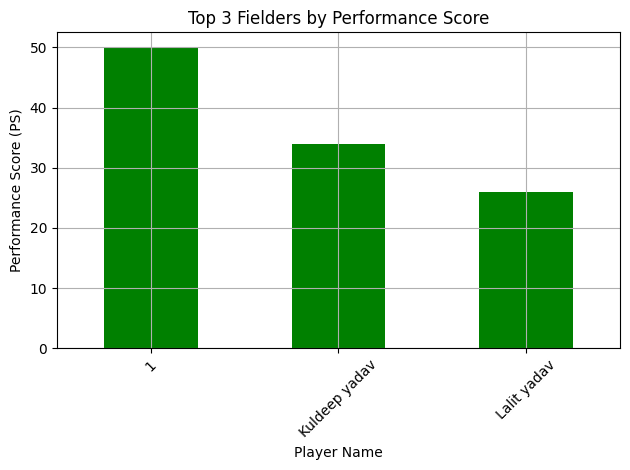

In [ ]:

top3 = df_grouped.head(3)
top3['PS'].plot(kind='bar', color='green')
plt.title("Top 3 Fielders by Performance Score")
plt.ylabel("Performance Score (PS)")
plt.xlabel("Player Name")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

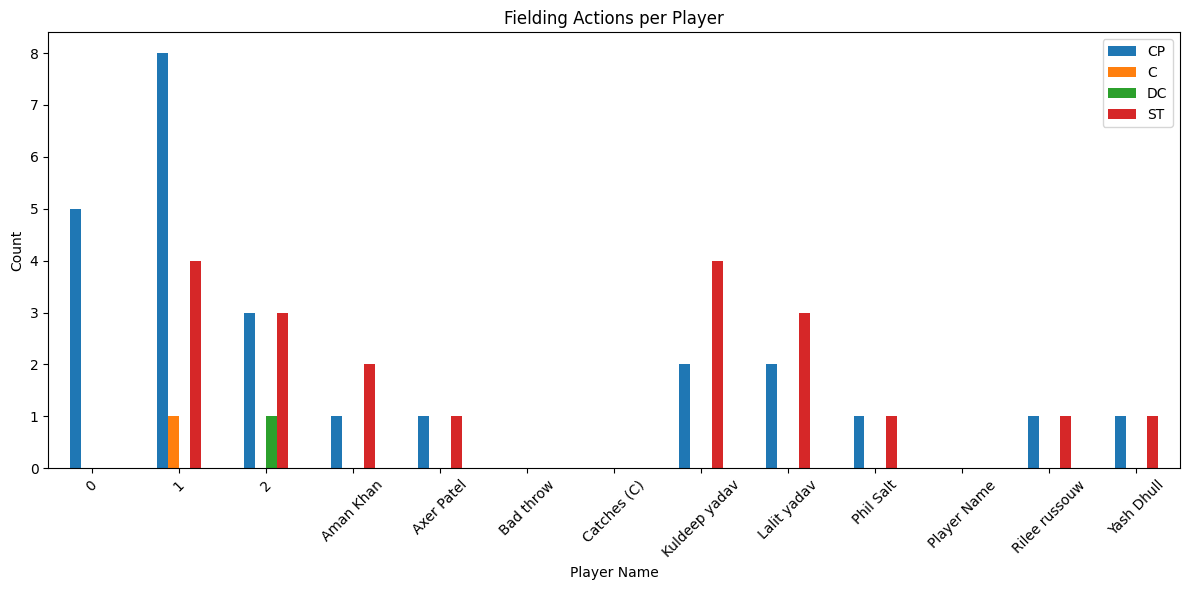

In [ ]:
action_cols = ['CP', 'C', 'DC', 'ST']
action_summary = df.groupby('Player Name')[action_cols].sum()

action_summary.plot(kind='bar', figsize=(12,6))
plt.title("Fielding Actions per Player")
plt.ylabel("Count")
plt.xlabel("Player Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


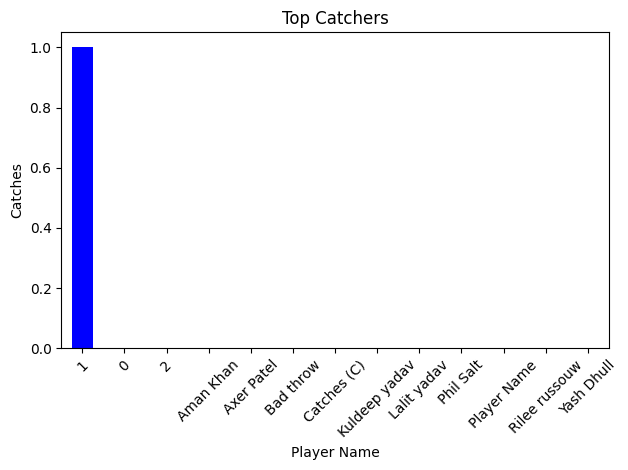

In [ ]:
best_catchers = df.groupby('Player Name')['C'].sum().sort_values(ascending=False)
best_catchers.plot(kind='bar', color='blue')
plt.title("Top Catchers")
plt.ylabel("Catches")
plt.xlabel("Player Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-24-cf6dd6922a65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_fielders, x="Player Name", y="PS", palette="viridis")


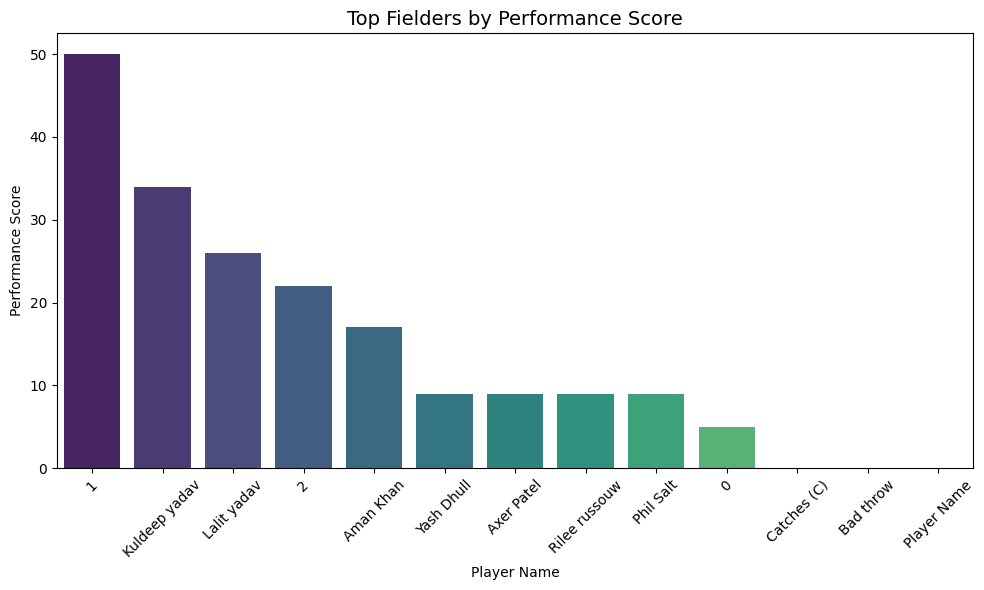

In [ ]:
top_fielders = df.groupby("Player Name")["PS"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=top_fielders, x="Player Name", y="PS", palette="viridis")
plt.title("Top Fielders by Performance Score", fontsize=14)
plt.ylabel("Performance Score")
plt.xlabel("Player Name")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

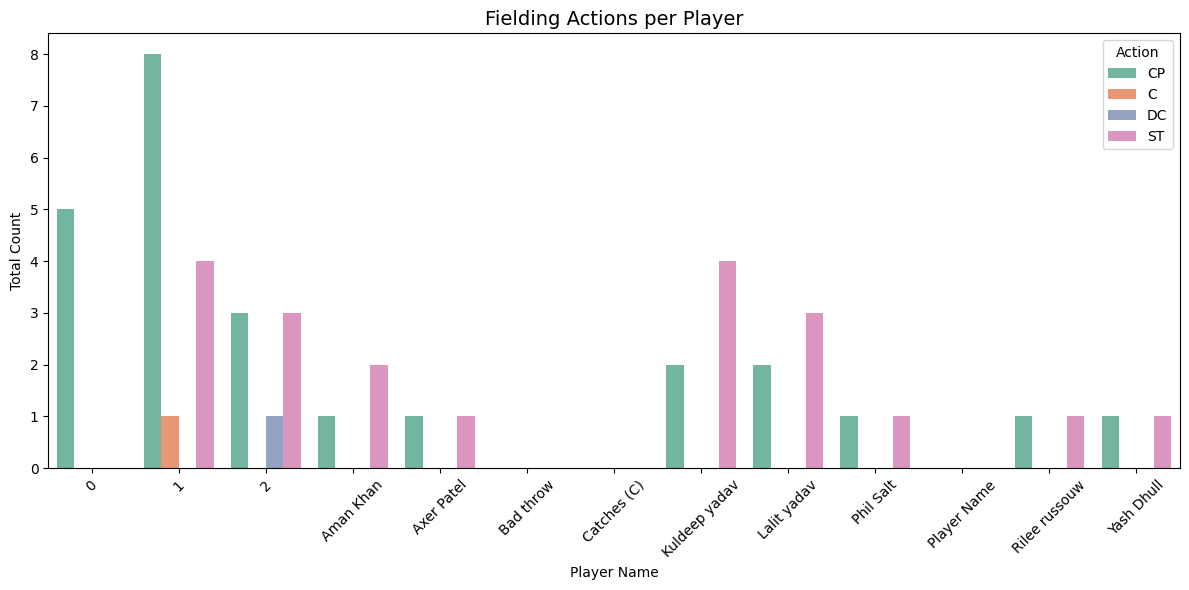

In [ ]:
action_cols = ['CP', 'C', 'DC', 'ST']
action_summary = df.groupby('Player Name')[action_cols].sum().reset_index()
action_summary_melted = action_summary.melt(id_vars='Player Name', var_name='Action', value_name='Count')

plt.figure(figsize=(12, 6))
plot = sns.barplot(data=action_summary_melted, x='Player Name', y='Count', hue='Action', palette='Set2')
plt.title("Fielding Actions per Player", fontsize=14)
plt.ylabel("Total Count")
plt.xlabel("Player Name")
plt.xticks(rotation=45)
plt.legend(title="Action")
plt.tight_layout()
plt.show()


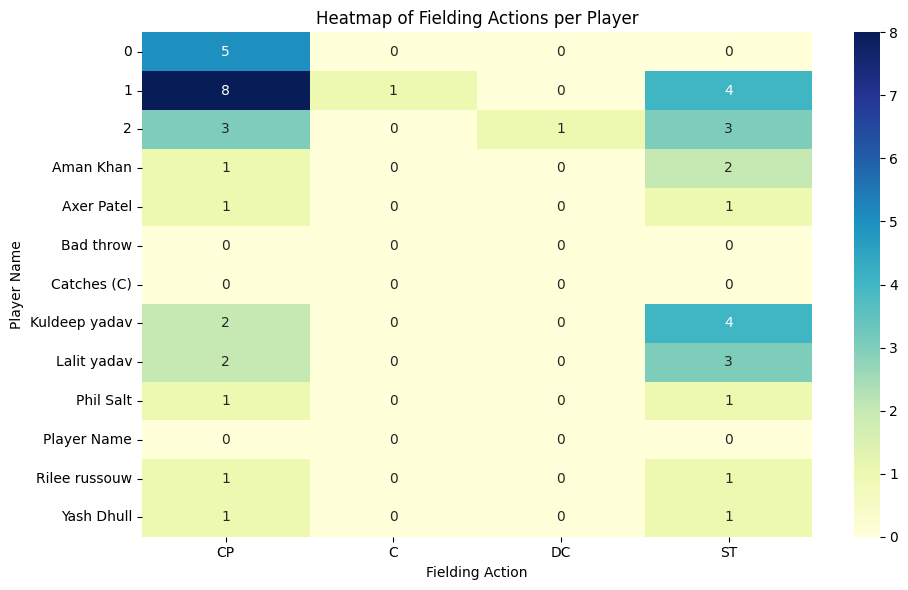

In [ ]:
action_heatmap = df.groupby('Player Name')[['CP', 'C', 'DC', 'ST']].sum()

plt.figure(figsize=(10, 6))
sns.heatmap(action_heatmap, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Heatmap of Fielding Actions per Player")
plt.ylabel("Player Name")
plt.xlabel("Fielding Action")
plt.tight_layout()
plt.show()

In [ ]:
df['Efficiency'] = df['PS'] / (df[['CP', 'C', 'DC', 'ST']].sum(axis=1) + 1)

In [ ]:
ps_summary = df.groupby('Player Name')['PS'].sum().sort_values(ascending=False)
top_5_ps = ps_summary.head(5)
bottom_5_ps = ps_summary.tail(5)
print(top_5_ps)
print(bottom_5_ps)

Player Name
1                50.0
Kuldeep yadav    34.0
Lalit yadav      26.0
2                22.0
Aman Khan        17.0
Name: PS, dtype: float64
Player Name
Phil Salt      9.0
0              5.0
Catches (C)    0.0
Bad throw      0.0
Player Name    0.0
Name: PS, dtype: float64


In [ ]:
action_cols = ['CP', 'C', 'DC', 'ST']
top_players = df[df['Player Name'].isin(top_5_ps.index)]
action_summary = top_players.groupby('Player Name')[action_cols + ['PS']].sum()
print(action_summary)

                CP    C   DC   ST    PS
Player Name                            
1              8.0  1.0  0.0  4.0  50.0
2              3.0  0.0  1.0  3.0  22.0
Aman Khan      1.0  0.0  0.0  2.0  17.0
Kuldeep yadav  2.0  0.0  0.0  4.0  34.0
Lalit yadav    2.0  0.0  0.0  3.0  26.0
